###Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

###Read CSV data into a DataFrame Object

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ISAA/creditcard.csv')
data = data.drop(['Time'] , axis=1)

In [ ]:
data.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

###Importing Modules

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

###Splitting of Dataset

In [ ]:
# Dividing the dataset into training and testing sets (60/40 class distribution)
y_true=data['Class']
df_data=data.drop('Class',1)
X_train, X_test, y_train, y_test = train_test_split(df_data, y_true, test_size=0.4, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


###Model Training and Prediction Functions

In [ ]:
# Train the model 5 times separately on 5 randomized samples of 10000 and add trained model to an model array
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

In [ ]:
## Prediction function
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

###Initialize Isolation forest model

In [ ]:
alg1=IsolationForest(n_estimators=100,
                     max_samples='auto',
                     contamination=0.01,
                     max_features=1.0,
                     bootstrap=False,
                     n_jobs=-1,
                     random_state=42,
                     verbose=0)

In [ ]:
alg2=IsolationForest(n_estimators=100,
                     max_samples='auto',
                     contamination=0.002,
                     max_features=1.0,
                     bootstrap=False,
                     n_jobs=-1,
                     random_state=42,
                     verbose=0)

In [ ]:
alg3=IsolationForest(n_estimators=100,
                     max_samples='auto',
                     contamination=0.0001,
                     max_features=1.0,
                     bootstrap=False,
                     n_jobs=-1,
                     random_state=42,
                     verbose=0)

###Training the Models

In [ ]:
if_mdlLst1=train(X_train,alg1)

# With contamination == 0.01
if_y_pred1=predict(X_test,if_mdlLst1)
if_y_pred1=1-if_y_pred1

#Creating class labels based on decision function
if_y_pred1_class=if_y_pred1.copy()
if_y_pred1_class[if_y_pred1>=np.percentile(if_y_pred1,95)]=1
if_y_pred1_class[if_y_pred1<np.percentile(if_y_pred1,95)]=0

# With contamination == 0.01
# print(roc_auc_score(y_test, if_y_pred1_class))
fpr1, tpr1, _1 = roc_curve(y_test, if_y_pred1_class)
# AUC
IF_auc1 = auc(fpr1, tpr1)
print(IF_auc1)

0.8971280513775104


In [ ]:
if_mdlLst2=train(X_train,alg2)

# With contamination == 0.002
if_y_pred2=predict(X_test,if_mdlLst2)
if_y_pred2=1-if_y_pred2

#Creating class labels based on decision function
if_y_pred2_class=if_y_pred2.copy()
if_y_pred2_class[if_y_pred2>=np.percentile(if_y_pred2,95)]=1
if_y_pred2_class[if_y_pred2<np.percentile(if_y_pred2,95)]=0

# With contamination == 0.002
fpr2, tpr2, _2 = roc_curve(y_test, if_y_pred2_class)
# AUC
IF_auc2 = auc(fpr2, tpr2)
print(IF_auc2)

0.9049946434190933


In [ ]:
if_mdlLst3=train(X_train,alg3)

# With contamination == 0.0001
if_y_pred3=predict(X_test,if_mdlLst3)
if_y_pred3=1-if_y_pred3

#Creating class labels based on decision function
if_y_pred3_class=if_y_pred3.copy()
if_y_pred3_class[if_y_pred3>=np.percentile(if_y_pred3,95)]=1
if_y_pred3_class[if_y_pred3<np.percentile(if_y_pred3,95)]=0

# With contamination == 0.0001
fpr3, tpr3, _3 = roc_curve(y_test, if_y_pred3_class)
# AUC
IF_auc3 = auc(fpr3, tpr3)
print(IF_auc3)

0.8971280513775104


###Confusion Matrix

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
if_cm1=confusion_matrix(y_test, if_y_pred1_class)
if_cm2=confusion_matrix(y_test, if_y_pred2_class)
if_cm3=confusion_matrix(y_test, if_y_pred3_class)

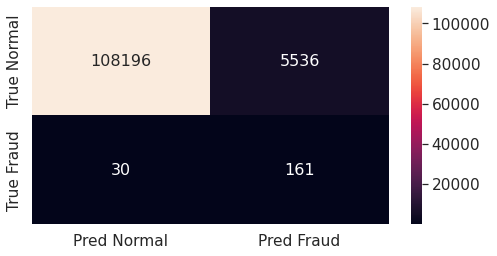

In [ ]:
# With contamination == 0.01
df_cm1 = pd.DataFrame(if_cm1,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 16},fmt='g')# font size

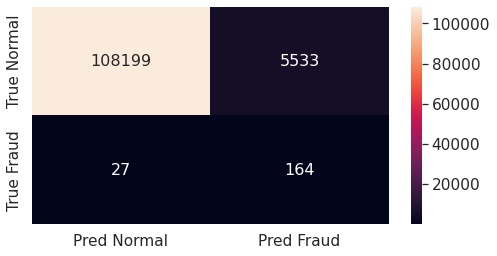

In [ ]:
# With contamination == 0.002
df_cm2 = pd.DataFrame(if_cm2,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm2, annot=True,annot_kws={"size": 16},fmt='g')# font size

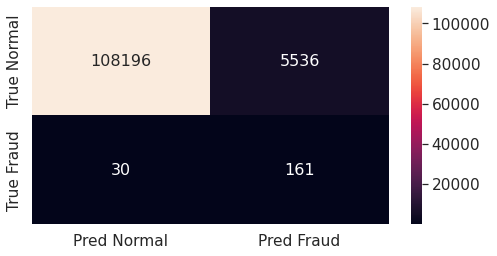

In [ ]:
# With contamination == 0.0001
df_cm3 = pd.DataFrame(if_cm3,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm3, annot=True,annot_kws={"size": 16},fmt='g')# font size